# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math
import skimage.io as io
import skimage


# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [21]:
'''
(1) Your own median filter algorithm
'''

def own_median(img):
    kernel_size = (3, 3)
    edge_x = math.floor(kernel_size[0] / 2)
    edge_y = math.floor(kernel_size[1] / 2)

    img_width = img.shape[1]
    img_height = img.shape[0]

    output_img = np.zeros(img.shape)
    for x in range(edge_x, img_width - edge_x ):
        for y in range(edge_y, img_height - edge_y ):
            color_array = np.ones(kernel_size)
            for i in range(0, kernel_size[0]):
                for j in range(0, kernel_size[1]):
                    color_array[j][i] = img[y + j - edge_y][x + i - edge_x]
            color_array = np.sort(color_array)
            output_img[y][x] = np.median(color_array)
    return output_img

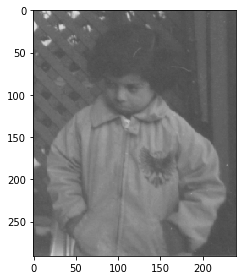

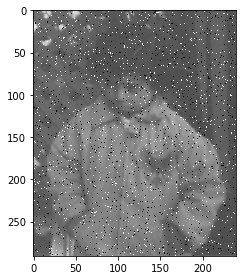

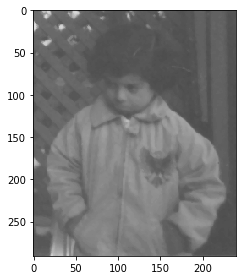

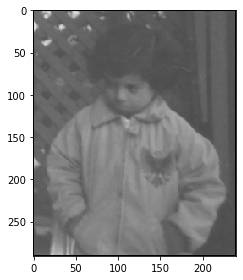

In [6]:
'''
(2) skimage median filter
'''
img = io.imread('pout.tif')
io.imshow(img)
io.show()


noise = random_noise(image = img, mode='s&p', amount = 0.05)
io.imshow(noise)
io.show()

own_med = own_median(noise)
med = skimage.filters.median(noise)

io.imshow(med)
io.show()

io.imshow(own_med)
io.show()

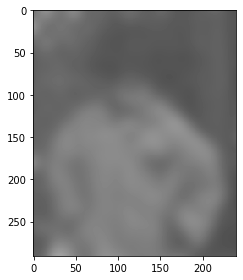

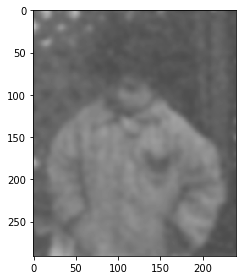

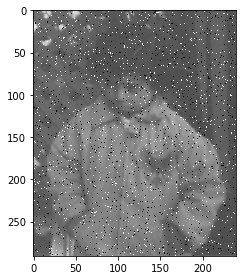

C:\Users\hazem\AppData\Local\Temp\ipykernel_20404\2262355044.py:14: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  gau = skimage.filters.rank.mean(noise, skimage.morphology.disk(3))


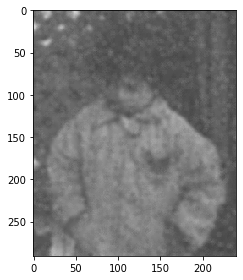

In [20]:
'''
(3) Gaussion Filters
'''

gau = skimage.filters.gaussian(noise, sigma=8)
io.imshow(gau)
io.show()
gau = skimage.filters.gaussian(noise, sigma=3)
io.imshow(gau)
io.show()
gau = skimage.filters.gaussian(noise, sigma=0.2)
io.imshow(gau)
io.show()
gau = skimage.filters.rank.mean(noise, skimage.morphology.disk(3))
io.imshow(gau)
io.show()
